# Project: Analyze A/B Test Results 

This project is designed to ensure proficiency in the subjects covered in the Practical Statistics lessons.  

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)


<a id='intro'></a>
## Introduction

The purpose of this project is to analyze the outcomes of an A/B test conducted by an e-commerce website. The objective is to provide insights and guidance to the company, aiding them in making informed decisions regarding their next steps.

Help the company understand if they should:  

- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

<a id='probability'></a>
## Part I - Probability

In [68]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [69]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Number of rows in the dataset

In [70]:
df.shape[0]

294478

**c.** Unique users in the dataset

In [71]:
df.user_id.nunique()

290584

**d.** Proportion of users converted.

In [72]:
df.converted.mean()

0.11965919355605512

[Mean](https://tinyurl.com/Probability-of-a-Sample-Mean)

**e.** Number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [73]:
#ANSWER - "group" treatment, "landing_page" old_page

df[(df['group'] == 'treatment') & (df['landing_page'] =='old_page')].count()['user_id']

1965

[Filter cols by multiple values](https://stackoverflow.com/questions/67928643/filter-a-column-by-multiple-values)

In [74]:
#Faster/easier way to group control and treatment couplings and their counts

df.groupby(['group', 'landing_page'])['user_id'].count()

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: user_id, dtype: int64

**f.** Check for missing values

In [75]:
# .isnull() detects missing values; "True" value = missing values
# .sum() counts the boolean "True" value from isnull()

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [76]:
#can also do df.info(); all have non-null (no missing values)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


The `control` group users should match with `old_page`  
The `treatment` group users should matched with the `new_page`. 

Rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`,   
we cannot be sure if those rows truly received the new or old wepage.  

**a.** Use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [77]:
# Part 1 - Remove rows where control does not match with old_page; saved as df1
# control == != old page (does not match)

df1 = df.drop(df[(df['group'] == 'control') == (df['landing_page'] != 'old_page')].index)
df2 = df1.drop(df1[(df1['group'] == 'treatment') == (df1['landing_page'] != 'new_page')].index)

[Drop rows on multiple conditions 1](https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe) , 
[Drop rows on multiple conditions 2](https://stackoverflow.com/questions/31997992/delete-rows-based-on-multiple-conditions-including-other-column-conditionals)  
**Note:** inplace = True kept it from being redefined

In [78]:
#Check remaining control and treatment groupings and their counts

df2.groupby(['group', 'landing_page'])['user_id'].count()

group      landing_page
control    old_page        145274
treatment  new_page        145311
Name: user_id, dtype: int64

In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


### ToDo 1.3  

**a.** How many unique **user_id**s are in **df2**?

In [80]:
# .nunique() returns the number of unique values

df2.user_id.nunique()

290584

In [81]:
#Self CHECK point- Another way to check for non-unique user_ids 
#check for duplicates

df2['user_id'].duplicated().sum()

1

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [82]:
#Find which user_id is duplicated

df2[df2.duplicated('user_id')]['user_id']


2893    773192
Name: user_id, dtype: int64

[Get list of duplicates](https://sparkbyexamples.com/pandas/pandas-get-list-of-all-duplicate-rows/#:~:text=You%20can%20use%20df%5Bdf,same%20values%20on%20all%20columns) , [Show duplicates](https://stackoverflow.com/questions/51591324/how-to-show-up-a-duplicate-in-python)

In [83]:
#print

dup_user_id = 773192
print(('\nThe duplicate user_id is: {}').format(dup_user_id))


The duplicate user_id is: 773192


**c.** Display the rows for the duplicate **user_id**? 

In [84]:
#Show rows for duplicated user_id

df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [85]:
#remove row 1899

df2.drop(1899, inplace=True)

In [86]:
#check removal

df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4 

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [87]:
#count the number of converted in df2

converts = df2[df2['converted'] == True].count()['user_id']
print(('There are {} converts.').format(converts))

There are 34753 converts.


In [88]:
#converted = population
#faster/easier way to find the probability; .mean()

p_population = df2.converted.mean()
p_population

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [89]:
#faster/easier way to find the probability; .mean()

ctrl_conv = df2.query('group == "control"')['converted'].mean()
ctrl_conv

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [90]:
#faster/easier way to find the probability; .mean()

treat_conv = df2.query('group == "treatment"')['converted'].mean()
treat_conv

0.11880806551510564

In [91]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.

obs_diff = treat_conv - ctrl_conv
obs_diff

-0.0015782389853555567

[A/B testing](https://medium.com/@Linpingyu/how-to-do-a-b-test-using-python-a-case-study-from-udacity-3e72e9b1b8c2)

**d.** What is the probability that an individual received the new page?

In [92]:
#faster/easier way to find the probability; .mean()

(df2['landing_page']=='new_page').mean()

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

**Answer:**   
The results do not show that the new treatment group lead to more conversions. The new page actually had a lower conversion rate than the old page. However, the difference was negligible. 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, a hypothesis test could continuously be run as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  

### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo1.4.c). 

* **H0:** A statement of 'no effect' or 'no difference'is often symbolized as H0.  
* **H1:** The statement that is being tested against the null hypothesis is the alternative hypothesis often symbolized as H1.

**Question:**    
What should be your null and alternative hypotheses if you want to assume that the old_page is better unless the new_page proves to be definitely better at a Type I error rate of 5%?  (**$H_0$** and **$H_1$**)  


You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

#### Answer:  

Null Hypothesis:    
H0: P_new - P_old <= 0 

Alternative Hypothesis:     
H1: P_new - P_old > 0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
<b>$p_{new}$ = $p_{old}$ = $p_{population}$</b>
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [93]:
#total number users/visits using df2

total2_visits = df2.shape[0]

In [94]:
#faster/easier
#p_new = p_population

p_new = p_population
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [95]:
#faster/easier
#p_old = p_population

p_old = p_population
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [96]:
n_new = df2.query('group=="treatment"').shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [97]:
n_old = df2.query('group=="control"').shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [98]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size = n_new, p = [p_new, 1-p_new])
new_page_converted.mean()

0.88024912256554955

[Random.choice](https://stackoverflow.com/questions/67703875/np-random-binomial-vs-random-choices-for-simulating-coin-flips)

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [99]:
# Simulate a Sample for the control Group
# p_new = p_old

old_page_converted = np.random.choice([0,1], size = n_old, p = [p_old, 1-p_old])
old_page_converted.mean()

0.87952420942494869

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [100]:
difference = new_page_converted.mean() - old_page_converted.mean()
difference

0.00072491314060085799

In [132]:
#alternative

new_page_converted2.mean() - old_page_converted2.mean()

-0.00091021629348375654


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [101]:
# Sampling distribution 
p_diffs = []

# Simulate and create 10,000 p_diff values
for i in range(10000):
    new_page_converted = np.random.choice([0,1], size = n_new, replace = True, p = (p_new, 1-p_new))
    old_page_converted = np.random.choice([0,1], size = n_old, replace = True, p = (p_old, 1-p_old))
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


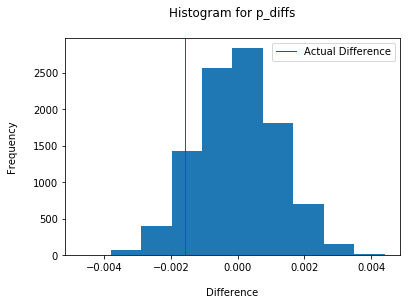

In [102]:
# First, convert p_diffs into a numpy array
#remember to run with alternative if wanting viz

p_diffs = np.array(p_diffs)

# Plot the histogram of p_diffs
plt.hist(p_diffs)
plt.title('Histogram for p_diffs\n')
plt.xlabel('\nDifference')
plt.ylabel('Frequency\n')
plt.axvline(x= obs_diff, color='r', linestyle='solid', linewidth=1, label="Actual Difference")
plt.legend()
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [103]:
(p_diffs > obs_diff).mean()

0.90139999999999998

**k.** Please explain in words what you have just computed in part **j** above.  
 - **Question:** What is this value called in scientific studies?  
 - **Question:** What does this value signify in terms of whether or not there is a difference between the new and old pages?      
 *Hint*: Compare the value above with the "Type I error rate (0.05)". 

#### **Answer:**   
The value is called P-value

Assuming the null hypothesis is true, if the P-value is less than 0.05 (Type I error rate) it would indicate a low probability thus rejecting the null hypothesis and choose the alternative hypothesis. (P-value <= Type 1 error)

In this example, the P-value is greater than the Type I error. (0.9013 > 0.05) Thus we do not have evidence to reject the null hypothesis. This means that there is not enough evidence to prove that the new_page has more converts.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [104]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[df2.group == 'control']['converted'].sum()

# number of conversions with the new_page
convert_new = df2[df2.group == 'treatment']['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2[df2.group == 'control']['user_id'].count()

# number of individuals who received new_page
n_new = df2[df2.group == 'treatment']['user_id'].count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 


### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
 
In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [105]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?    
Do they agree with the findings in parts **j.** and **k.**?

#### **Answer:**  
The z-score represents the difference between conversion rates making the the null hypothesis -1.31 standard deviations below the mean. The Type I error is 5% so it is assumed the confidence interval is 95%. This is less than the critical value for 95%  which has an interval of -1.96 to 1.96. The z-score is within this interval so the null hypothesis is not rejected (fail to reject). The result corresponds with the outcome from part k.

The p-value (0.905) is very similar to the answer in part j so the same conclusion can be made to reject the null hypothesis. 

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

#### **Answer:**  
Logic Regression (binary results)

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [106]:
#add intercept column
df2['intercept'] = 1

#get_dummies stores the columns in alphabetical order, so they would be ['control', 'treatment']
df2[['control', 'ab_page']] = pd.get_dummies(df2.group)

#drop column 'control'; not neccessary now
df2.drop('control', axis = 1, inplace = True)

df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


I found this helpful [get_dummies](https://www.askpython.com/python-modules/pandas/pandas-get-dummies)

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [107]:
# Fit your model

#Instantiate
logit_mod = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])

# Fit the model
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


I found this helpful [Logit](https://www.pythonfordatascience.org/logistic-regression-python/)

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [108]:
# Summarize results

results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2024-03-09 08:31 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [109]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

I found this helpful [.summary2()](https://www.adrian.idv.hk/2021-07-16-statsmodels/)

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

#### **Answer:**  
p-value of ab_page: 0.1899
The p-value is larger than the Type 1 error threshold so we still fail to reject the null hypothesis.

Part II's test was one-sided whereas Part III's is two-sided. Thus it is expected that there would be different p-values.

H0: p-new - p_old = 0  
H1: p_new - p_old != 0

I found this helpful [tail p values](https://www.graphpad.com/support/faq/p-values-one-tail-or-two-tail-/)

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### **Answer:**
The results so far have shown that there really isn't greater response with either the old_page or new_page. To better understand the population and to improve predictave ability, other factors may want to be taken into account. Possible factors to consider are age, new or returning customer and location. Multicolinearity could be an issue so care should be taken when selecting which factors are used for further exploration. 

#alternative addition

Considering Multiple Factors can increase accuracy of prediction, since not all things in life happen due to only one factor. However, adding multiple factors can break the calculations of the model and cause it to display results that don't make sense, since every model assumes certain properties regarding input data, if these properties do not exist for the factors entered, the results could be inaccurate.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

Provide the statistical output as well as a written response to answer this question.

In [110]:
# Read the countries.csv
df_countries = pd.read_csv('countries.csv')

In [111]:
df_countries.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [112]:
# Join with the df2 dataframe
df_merged = df2.join(df_countries.set_index('user_id'), on='user_id')

In [113]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])

In [114]:
df_merged.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [115]:
# Fit your model, and summarize the results

#Instantiate
log_mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page' , 'UK' , 'US']])

#Fit
results_merged = log_mod.fit()

#Summarize
results_merged.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2024-03-09 08:33 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

#### **Answer:**  
The summary shows that the p-values are higher than the 0.05 threshold, thus we fail to reject the null hypothesis and can conclude that a user's country of origin does not affect results. 

**Statistically:** The Results provided in the summary indicate that both country and page factors are not statistically significant, as their p-values (0.19, 0.07, 0.13) are much greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis that states that they have no effect on the conversion rate

**Practically:** All of the tests performed have given no evidence that the new landing page has a higher conversion rate. Therefore, It is recommended that the old webpage is kept.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [116]:
# Interaction betwen page and country

df_merged['ab_page_UK'] = df_merged['ab_page'] * df_merged['UK']
df_merged['ab_page_US'] = df_merged['ab_page'] * df_merged['US']

In [117]:
# Fit your model, and summarize the results

#Instantiate
logit_mod_merged = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page','UK', 'US', 'ab_page_UK', 'ab_page_US']])

#Fit
merged_results = logit_mod_merged.fit()

#Summarize
merged_results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2024-03-09 08:35 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_page_UK     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_page_US     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

#### **Answer:**
Again, the summary shows that the p-values are higher than the 0.05 threshold, thus we fail to reject the null hypothesis and can conclude that the interactions do not appear to affect conversions.

In conclusion, we do not have enough evidence in any of our A/B testing to reject the null hypothesis. This means that the old and new pages appear to perform equally well so there is no reason to switch to the new page. 

## Conclusion

**Statistically:** Using three different methods, Probability, A/B Testing, and Regression. There has not been enough statistical evidence to reject the Null Hypothesis that assumes that the conversion rate of the new page is less than or equal to that of the old page. Therefore, we fail to reject the Null Hypothesis.

**Practically:** All of the tests performed have given no evidence that the new landing page has a higher conversion rate. Therefore, It is recommended that the old webpage is kept.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])